In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree, beyond that it is up to you. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. This will be a rough ranking, I'm assuming most people will get a similar level of accuracy, marks will only be deducted if yours is far wosrse, as that's an indication that you probably didn't take any/many steps to improve things. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
    <ul>
    <li> <b>Note:</b> for this assignment, and in general, please get rid of my comments and replace them with your own. I'm going to read this, so all of these instructions aren't really required. Think of this as a template, get rid of the stuff that isn't needed, and leave only the things you need to explain your code. 
    </ul>
</ul>

For submission, please drop the URL for your repository in the dropbox.

In [68]:
#Please change to your name.
name = "Gulen Kustutan"

#Please use this to control EDA. 
show_eda = False

In [69]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
191,0,0.934,0.631,0.310,0.900,0.439,0.333,0.808,0.851,0.504,...,0.523,0.630,0.896,0.773,0.802,0.671,0.388,0.700,0.062,0.022
176,0,0.629,0.626,0.583,0.805,0.049,0.028,0.643,0.078,0.124,...,0.174,0.394,0.951,0.064,0.063,0.988,0.637,0.853,0.399,0.120
197,0,0.748,0.018,0.670,0.265,0.011,0.616,0.961,0.384,0.930,...,0.601,0.291,0.219,0.880,0.252,0.016,0.271,0.301,0.512,0.914
228,0,0.445,0.182,0.909,0.845,0.876,0.706,0.134,0.029,0.998,...,0.436,0.218,0.644,0.485,0.294,0.811,0.616,0.576,0.256,0.471
207,1,0.988,0.257,0.065,0.737,0.623,0.694,0.983,0.552,0.719,...,0.889,0.508,0.331,0.257,0.984,0.225,0.422,0.512,0.884,0.784


### Starting

For this assignment, you have a small training set, so combatting overfitting is key in being accurate!

In [70]:
df.shape

(250, 201)

#### Do Modelling Stuff

Make a tree model (of some vareity) and make it fit well. Keep in mind the possibility of your tree overfitting, and think of steps you may need to combat that shoudl it occur. 

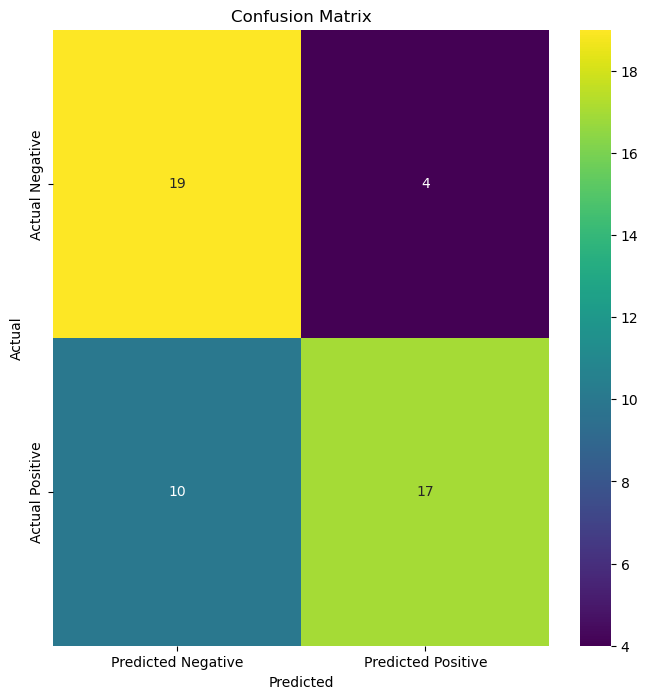

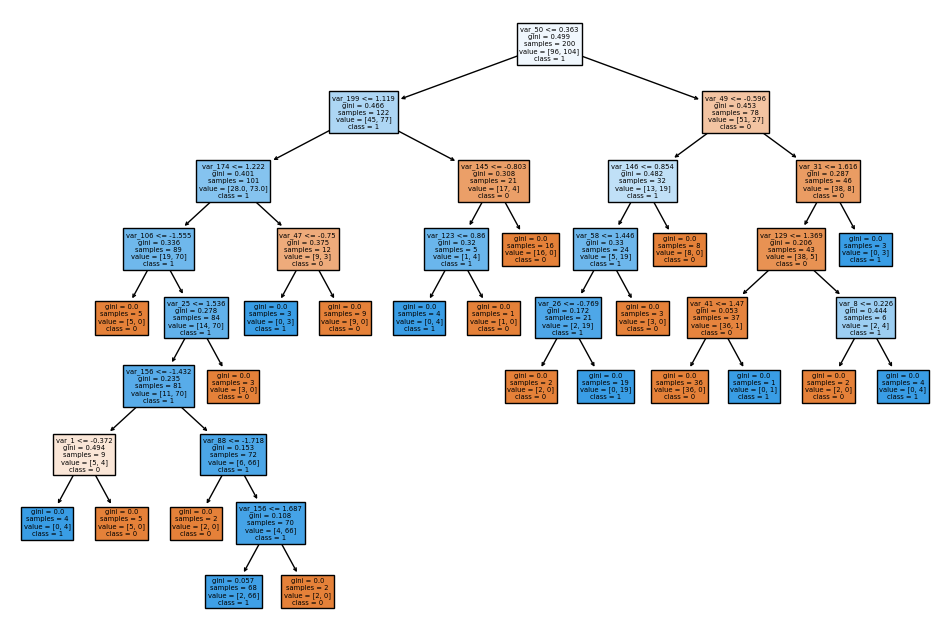

Accuracy: 0.72
roc_auc: 0.7278582930756845


In [71]:

# Load the training data
df = pd.read_csv('training.csv')

# Drop the 'id' column
df = df.drop(columns=["id"])

# Define features and target
X = df.drop(columns=["target"])
y= df["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5000)

# Define numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create transformers for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OneHotEncoder())
])

# Create a ColumnTransformer that applies transformers to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the overall pipeline with preprocessor and DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__ccp_alpha':[0.002,0.003,0.005,0.006, 0.007,0.008,0.009,0.01],
    'classifier__max_depth': [6,7,8]
}

# Create GridSearchCV object
scoring = {
    'precision': make_scorer(precision_score),
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Create GridSearchCV 
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring=scoring, refit='accuracy')


# Fit the model on the training data with grid search
grid_search.fit(X_train, y_train)

# Pick the best model from grid search
best = grid_search.best_estimator_


# Make predictions on the test set
preds = best.predict(X_test)


# Calculate accuracy and roc_auc score
acc_score = accuracy_score(y_test, preds)
roc_score = roc_auc_score(y_test, preds)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, preds)

# Create heatmap for confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best.named_steps['classifier'], filled=True, feature_names=X_train.columns, class_names=['0', '1'])
plt.show()


# Print accuracy
print("Accuracy:", acc_score)
print('roc_auc:',roc_score )


### Finishing

At the conclusion, please name your best model "best". If you look down below in the testing stuff, it should be usable to score as "best". 

You should be able to call it like this and it should work (with whatever data names you have)

In [72]:

print(best.score(X_test, y_test))
print(best)

0.72
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10',
       ...
       'var_191', 'var_192', 'var_193', 'var_194', 'var_195', 'var_196',
       'var_197', 'var_198', 'var_199', 'var_200'],
      dtype='object', length=200)),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
           

### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})

#Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

test_X_df = pd.DataFrame(test_X, columns=test_df.drop(columns={"target"}).columns)

# Use the predict method with the DataFrame
preds = best.predict(test_X_df)


roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))



0.5363641574051949
0.536506329113924
Gulen Kustutan 0.5364352432595595


### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:
<li>I have tried several tree models including DecisionTreeClassifier and RandomForestClassifier but DecisionTreeClassifier seemed to have better accuracy so I decided to go with that one.
<li>I have perfomed hyperparameter tuning using GridSearchCV to find the best hyperparameters for my model model. 
<li>I have created a dictionary for scoring from GridSearchCV picks the best one.
<li>I have used ccp_alpha and max_depth to tune the hyperparameters for the decision tree. I have tried several values and picked out the ones that seemed to perform better.
</ul>